In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import zipfile
import os
import urllib.request

import cv2

import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

2024-10-20 22:43:24.267462: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 22:43:24.282503: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 22:43:24.287056: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 22:43:24.299302: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-20 22:43:25.227569: W tensorflow/compiler/tf2

In [2]:
train_dir = './data_learn/Face Mask Dataset/Train'
test_dir = './data_learn/Face Mask Dataset/Test'
val_dir = './data_learn/Face Mask Dataset/Validation'

In [3]:
train_datagen = ImageDataGenerator(rescale=1.0/255, 
                                   horizontal_flip=True, 
                                   zoom_range=0.2,
                                   shear_range=0.2)
train_dataset = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(128,128),
                                                    class_mode='categorical',
                                                    batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_dataset = train_datagen.flow_from_directory(directory=val_dir,
                                                  target_size=(128,128),
                                                  class_mode='categorical',
                                                  batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_dataset = train_datagen.flow_from_directory(directory=test_dir,
                                                    target_size=(128,128),
                                                    class_mode='categorical',
                                                    batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [4]:

# model = models.Sequential()


# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.BatchNormalization()) 

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.BatchNormalization())

# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.BatchNormalization())

# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.BatchNormalization())

# model.add(layers.Flatten())
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))  


# model.add(layers.Dense(2, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

# model.compile(optimizer=Adam(learning_rate=0.0001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model.summary()  


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

model = models.Sequential()
model.add(base_model)

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(2, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

I0000 00:00:1729453405.960936   28305 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729453406.004732   28305 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729453406.004967   28305 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729453406.006003   28305 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,650 (60.13 MB)

 Trainable params: 1,048,962 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [5]:
K.clear_session()
tf.compat.v1.reset_default_graph()
tf.keras.backend.clear_session()

In [6]:
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=0.00001)

history = model.fit(train_dataset, batch_size=32,
                    epochs=3, 
                    validation_data=val_dataset,
                    callbacks=[early_stopping]
                    )



Epoch 1/3


/home/developer/anaconda3/envs/cv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729453409.127886   28506 service.cc:146] XLA service 0x7efcb000cce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729453409.127907   28506 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 3GB, Compute Capability 6.1
2024-10-20 22:43:29.153926: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-20 22:43:29.330168: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907

  2/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.5312 - loss: 0.8463 

I0000 00:00:1729453417.445836   28506 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 92/313 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.8173 - loss: 0.4074

2024-10-20 22:43:46.501993: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.54GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-20 22:43:47.618514: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-20 22:43:48.500509: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.21GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-20 22:43:48.895735: W external/local_tsl/tsl/framework/bfc_

313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 114ms/step - accuracy: 0.9053 - loss: 0.2492 - val_accuracy: 0.9900 - val_loss: 0.0696
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 97ms/step - accuracy: 0.9867 - loss: 0.0815 - val_accuracy: 0.9925 - val_loss: 0.0593
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 96ms/step - accuracy: 0.9889 - loss: 0.0684 - val_accuracy: 0.9900 - val_loss: 0.0601


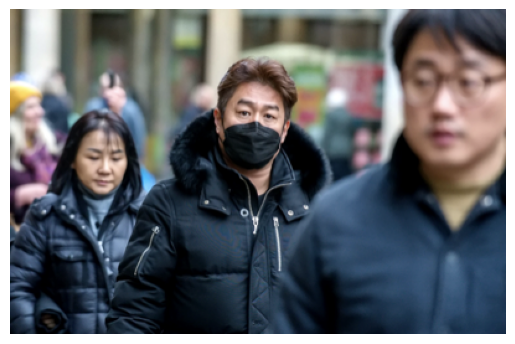

In [46]:
image = cv2.imread('./data_test/images/maksssksksss244.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [47]:
url = "https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml"

cascade_path = './haarcascade_frontalface_default.xml'
urllib.request.urlretrieve(url, cascade_path)

detector_face = cv2.CascadeClassifier(cascade_path)

In [48]:
deteccoes = detector_face.detectMultiScale(image)
deteccoes

array([[ 47,  97,  54,  54],
       [170,  59,  58,  58],
       [296,  21, 102, 102]], dtype=int32)

In [49]:
test_dataset.class_indices.keys()

dict_keys(['WithMask', 'WithoutMask'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


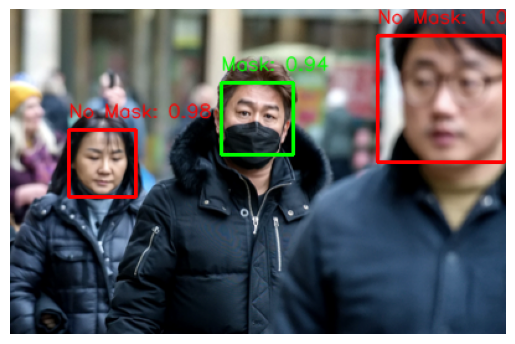

In [50]:
class_labels = {'WithMask': 'Mask', 'WithoutMask': 'No Mask'}

for (x, y, w, h) in deteccoes:

    roi = image[y:y + h, x:x + w]
    roi_mask = cv2.resize(roi, (128, 128)) 
    roi_mask = roi_mask / 255.0 
    roi_mask = np.expand_dims(roi_mask, axis=0)  

    forecasts = model.predict(roi_mask)
    
    predicted_class = np.argmax(forecasts)
    predicted_label = list(class_labels.keys())[predicted_class]
    predicted_short_label = class_labels[predicted_label]  
    predicted_prob = forecasts[0][predicted_class]  

    if predicted_class == 0:  
        color = (0, 255, 0)  
    else: 
        color = (0, 0, 255)  


    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)

    text = f'{predicted_short_label}: {predicted_prob:.2f}'
    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1, cv2.LINE_AA)  

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)
plt.axis('off')
plt.show()
